In [4]:
%cd 'Data_Cleaning'

/Users/ms731/Documents/Physics/PhD/NLP/Analyzing-Twitter-Trends-On-COVID-19-Vaccinations/Codes Used/Data_Cleaning


In [5]:
import pandas as pd
import string
import sys,csv,re

In [6]:
Tweets_Jan = pd.read_csv('Tweets_Feb.csv')

In [7]:
Tweets_Jan.head(5)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,Are you ready to roll your sleeve up for the C...,USAGov,3,USAGov,en
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"I've been trying to tweet about Dr Yeadon, for...",seeker375,0,Matthew,en
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,U.S. authorizes Johnson &amp; Johnson’s COVID-...,The_StreetPress,0,The Street Press,en
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,The Food and Drug Administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@AP There’s three COVID-19 vaccines but Flint,...",NxtLevelPromo_,36,NxtLevelPromo,en


In [6]:
Tweets_Jan = Tweets_Jan.rename(columns={'Tweet ID': 'Tweet Id'})

In [7]:
Tweets_Jan.head(5)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,Are you ready to roll your sleeve up for the C...,USAGov,3,USAGov,en
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"I've been trying to tweet about Dr Yeadon, for...",seeker375,0,Matthew,en
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,U.S. authorizes Johnson &amp; Johnson’s COVID-...,The_StreetPress,0,The Street Press,en
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,The Food and Drug Administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@AP There’s three COVID-19 vaccines but Flint,...",NxtLevelPromo_,36,NxtLevelPromo,en


In [8]:
Tweets_Jan.shape

(8008, 8)

In [22]:
Tweets_J = Tweets_Jan[Tweets_Jan['Language']=='en']

In [23]:
Tweets_J.shape

(7839, 8)

In [25]:
Tweets_J.head(15)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,Are you ready to roll your sleeve up for the C...,USAGov,3,USAGov,en
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"I've been trying to tweet about Dr Yeadon, for...",seeker375,0,Matthew,en
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,U.S. authorizes Johnson &amp; Johnson’s COVID-...,The_StreetPress,0,The Street Press,en
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,The Food and Drug Administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@AP There’s three COVID-19 vaccines but Flint,...",NxtLevelPromo_,36,NxtLevelPromo,en
5,5,2021-02-27 23:59:56+00:00,1365813951544623106,"""FDA grants emergency use authorization for Jo...",DWR_Productions,0,Doctor Who Rebirth Productions,en
6,6,2021-02-27 23:59:49+00:00,1365813925082763266,Johnson &amp; Johnson's COVID-19 vaccine gets ...,WENYNicholasP,0,Nicholas Phillips,en
7,7,2021-02-27 23:59:46+00:00,1365813911208030213,@aamots20 @likethe309 My cousin is a doctor wh...,xphile101,1,Michelle,en
8,8,2021-02-27 23:59:39+00:00,1365813878995759108,https://t.co/5CRxKh1W1M FDA Issues Emergency U...,German_Dictator,0,Captor Zone,en
9,9,2021-02-27 23:59:36+00:00,1365813869608902658,We have a new #COVIDVaccine! Learn more: https...,ThinkBlueSC,1,Why SC,en


In [26]:
Tweets_J.reset_index(drop=True)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,Are you ready to roll your sleeve up for the C...,USAGov,3,USAGov,en
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"I've been trying to tweet about Dr Yeadon, for...",seeker375,0,Matthew,en
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,U.S. authorizes Johnson &amp; Johnson’s COVID-...,The_StreetPress,0,The Street Press,en
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,The Food and Drug Administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@AP There’s three COVID-19 vaccines but Flint,...",NxtLevelPromo_,36,NxtLevelPromo,en
...,...,...,...,...,...,...,...,...
7834,996,2021-02-02 23:20:34+00:00,1356744350391296005,Some Dallas Doctors ‘Stunned’ That Dozens Who ...,Secureinaustin,0,C Stewart,en
7835,997,2021-02-02 23:20:33+00:00,1356744344884023297,I've been tracking reactions. Look on my page....,it_exposing,0,Exposing It All,en
7836,998,2021-02-02 23:20:33+00:00,1356744342602305537,Canada signs deal with Novavax to make its COV...,ab_primetimes,0,Alberta Prime Times,en
7837,999,2021-02-02 23:20:33+00:00,1356744342560403456,COVID-19 vaccine distribution hits hurdle at n...,TheRadioTFI,0,Radio TFI (Home of The Taxi Stand Hour),en


In [27]:
#All LowerCase
Tweets_J['Text'] = Tweets_J['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Tweets_J.head()

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_38592/303896001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_J['Text'] = Tweets_J['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,are you ready to roll your sleeve up for the c...,USAGov,3,USAGov,en
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"i've been trying to tweet about dr yeadon, for...",seeker375,0,Matthew,en
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,u.s. authorizes johnson &amp; johnson’s covid-...,The_StreetPress,0,The Street Press,en
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,the food and drug administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@ap there’s three covid-19 vaccines but flint,...",NxtLevelPromo_,36,NxtLevelPromo,en


In [29]:
#Removing Punctuation
Tweets_J['Text_punc'] = Tweets_J['Text'].str.replace('[^\w\s]','')
Tweets_J.head()

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_38592/3053094530.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_J['Text_punc'] = Tweets_J['Text'].str.replace('[^\w\s]','')
/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_38592/3053094530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_J['Text_punc'] = Tweets_J['Text'].str.replace('[^\w\s]','')


,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_punc
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,are you ready to roll your sleeve up for the c...,USAGov,3,USAGov,en,are you ready to roll your sleeve up for the c...
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"i've been trying to tweet about dr yeadon, for...",seeker375,0,Matthew,en,ive been trying to tweet about dr yeadon for a...
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,u.s. authorizes johnson &amp; johnson’s covid-...,The_StreetPress,0,The Street Press,en,us authorizes johnson amp johnsons covid19 vac...
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,the food and drug administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en,the food and drug administration has authorize...
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@ap there’s three covid-19 vaccines but flint,...",NxtLevelPromo_,36,NxtLevelPromo,en,ap theres three covid19 vaccines but flint mic...


In [30]:
#Removal of stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#stop.append("covid vaccine")
#stop.append("covid19 vaccine")
Tweets_J['Text_stop']  = Tweets_J['Text_punc'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Tweets_J.head()

[nltk_data] Downloading package stopwords to /Users/ms731/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_38592/3266781543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_J['Text_stop']  = Tweets_J['Text_punc'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))


,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_punc,Text_stop
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,are you ready to roll your sleeve up for the c...,USAGov,3,USAGov,en,are you ready to roll your sleeve up for the c...,ready roll sleeve covid19 vaccine state regist...
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,"i've been trying to tweet about dr yeadon, for...",seeker375,0,Matthew,en,ive been trying to tweet about dr yeadon for a...,ive trying tweet dr yeadon long time days woul...
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,u.s. authorizes johnson &amp; johnson’s covid-...,The_StreetPress,0,The Street Press,en,us authorizes johnson amp johnsons covid19 vac...,us authorizes johnson amp johnsons covid19 vac...
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,the food and drug administration has authorize...,Richard31225984,0,Demosthenies MAN / MAN,en,the food and drug administration has authorize...,food drug administration authorized johnson am...
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,"@ap there’s three covid-19 vaccines but flint,...",NxtLevelPromo_,36,NxtLevelPromo,en,ap theres three covid19 vaccines but flint mic...,ap theres three covid19 vaccines flint michiga...


In [31]:
#Tokenization of Tweets
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text
Tweets_J['Text_tokenized'] = Tweets_J['Text_stop'].apply(lambda x: tokenization(x.lower()))
Tweets_J[['Text', 'Text_punc', 'Text_stop', 'Text_tokenized']][0:9]

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_38592/561402826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_J['Text_tokenized'] = Tweets_J['Text_stop'].apply(lambda x: tokenization(x.lower()))


,Text,Text_punc,Text_stop,Text_tokenized
0,are you ready to roll your sleeve up for the c...,are you ready to roll your sleeve up for the c...,ready roll sleeve covid19 vaccine state regist...,"[ready, roll, sleeve, covid19, vaccine, state,..."
1,"i've been trying to tweet about dr yeadon, for...",ive been trying to tweet about dr yeadon for a...,ive trying tweet dr yeadon long time days woul...,"[ive, trying, tweet, dr, yeadon, long, time, d..."
2,u.s. authorizes johnson &amp; johnson’s covid-...,us authorizes johnson amp johnsons covid19 vac...,us authorizes johnson amp johnsons covid19 vac...,"[us, authorizes, johnson, amp, johnsons, covid..."
3,the food and drug administration has authorize...,the food and drug administration has authorize...,food drug administration authorized johnson am...,"[food, drug, administration, authorized, johns..."
4,"@ap there’s three covid-19 vaccines but flint,...",ap theres three covid19 vaccines but flint mic...,ap theres three covid19 vaccines flint michiga...,"[ap, theres, three, covid19, vaccines, flint, ..."
5,"""fda grants emergency use authorization for jo...",fda grants emergency use authorization for joh...,fda grants emergency use authorization johnson...,"[fda, grants, emergency, use, authorization, j..."
6,johnson &amp; johnson's covid-19 vaccine gets ...,johnson amp johnsons covid19 vaccine gets emer...,johnson amp johnsons covid19 vaccine gets emer...,"[johnson, amp, johnsons, covid19, vaccine, get..."
7,@aamots20 @likethe309 my cousin is a doctor wh...,aamots20 likethe309 my cousin is a doctor who ...,aamots20 likethe309 cousin doctor covid last y...,"[aamots20, likethe309, cousin, doctor, covid, ..."
8,https://t.co/5crxkh1w1m fda issues emergency u...,httpstco5crxkh1w1m fda issues emergency use au...,httpstco5crxkh1w1m fda issues emergency use au...,"[httpstco5crxkh1w1m, fda, issues, emergency, u..."


In [18]:
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. 
#For this purpose, we will use PorterStemmer from the NLTK library.
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()
#def stemming(text):
#    text = [ps.stem(word) for word in text]
#    return text
#
#Tweets_J['Text_stemmed'] = Tweets_J['Text_tokenized'].apply(lambda x: stemming(x))
#Tweets_J[['Text', 'Text_punc', 'Text_tokenized','Text_stop','Text_stemmed']][0:9]

In [20]:
# Must download this in order for the next cell to run
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ms731/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
#Lemmatization is a more effective option than stemming because it converts the word into its root word, 
#rather than just stripping the suffices.
#nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

Tweets_J['Text_lemmatized'] = Tweets_J['Text_tokenized'].apply(lambda x: lemmatizer(x))
Tweets_J[['Text', 'Text_punc', 'Text_tokenized','Text_stop','Text_lemmatized']][0:90]

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_38592/2722826332.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_J['Text_lemmatized'] = Tweets_J['Text_tokenized'].apply(lambda x: lemmatizer(x))


,Text,Text_punc,Text_tokenized,Text_stop,Text_lemmatized
0,are you ready to roll your sleeve up for the c...,are you ready to roll your sleeve up for the c...,"[ready, roll, sleeve, covid19, vaccine, state,...",ready roll sleeve covid19 vaccine state regist...,"[ready, roll, sleeve, covid19, vaccine, state,..."
1,"i've been trying to tweet about dr yeadon, for...",ive been trying to tweet about dr yeadon for a...,"[ive, trying, tweet, dr, yeadon, long, time, d...",ive trying tweet dr yeadon long time days woul...,"[ive, trying, tweet, dr, yeadon, long, time, d..."
2,u.s. authorizes johnson &amp; johnson’s covid-...,us authorizes johnson amp johnsons covid19 vac...,"[us, authorizes, johnson, amp, johnsons, covid...",us authorizes johnson amp johnsons covid19 vac...,"[u, authorizes, johnson, amp, johnson, covid19..."
3,the food and drug administration has authorize...,the food and drug administration has authorize...,"[food, drug, administration, authorized, johns...",food drug administration authorized johnson am...,"[food, drug, administration, authorized, johns..."
4,"@ap there’s three covid-19 vaccines but flint,...",ap theres three covid19 vaccines but flint mic...,"[ap, theres, three, covid19, vaccines, flint, ...",ap theres three covid19 vaccines flint michiga...,"[ap, there, three, covid19, vaccine, flint, mi..."
...,...,...,...,...,...
89,health communications crowdsourcing time: if y...,health communications crowdsourcing time if yo...,"[health, communications, crowdsourcing, time, ...",health communications crowdsourcing time youre...,"[health, communication, crowdsourcing, time, y..."
90,do we really think the 14.9 % of our pop vacci...,do we really think the 149 of our pop vaccina...,"[really, think, 149, pop, vaccinated, 1, dose,...",really think 149 pop vaccinated 1 dose covid 1...,"[really, think, 149, pop, vaccinated, 1, dose,..."
91,u.s. health advisers endorsed a one-dose covid...,us health advisers endorsed a onedose covid19 ...,"[us, health, advisers, endorsed, onedose, covi...",us health advisers endorsed onedose covid19 va...,"[u, health, adviser, endorsed, onedose, covid1..."
92,#breaking #biden issues stmt re: us food and d...,breaking biden issues stmt re us food and drug...,"[breaking, biden, issues, stmt, us, food, drug...",breaking biden issues stmt us food drug admin ...,"[breaking, biden, issue, stmt, u, food, drug, ..."


In [22]:
Tweets_J.drop(columns=['Text', 'Text_punc', 'Text_tokenized', 'Text_stop', 'Language'])

,Unnamed: 0,Datetime,Tweet Id,Username,Like Count,Display Name,Text_lemmatized
0,0,2021-02-27 23:59:59+00:00,1365813964756692993,USAGov,3,USAGov,"[ready, roll, sleeve, covid19, vaccine, state,..."
1,1,2021-02-27 23:59:59+00:00,1365813964320501767,seeker375,0,Matthew,"[ive, trying, tweet, dr, yeadon, long, time, d..."
2,2,2021-02-27 23:59:58+00:00,1365813962739179523,The_StreetPress,0,The Street Press,"[u, authorizes, johnson, amp, johnson, covid19..."
3,3,2021-02-27 23:59:58+00:00,1365813959333318656,Richard31225984,0,Demosthenies MAN / MAN,"[food, drug, administration, authorized, johns..."
4,4,2021-02-27 23:59:57+00:00,1365813958163111938,NxtLevelPromo_,36,NxtLevelPromo,"[ap, there, three, covid19, vaccine, flint, mi..."
...,...,...,...,...,...,...,...
8003,996,2021-02-02 23:20:34+00:00,1356744350391296005,Secureinaustin,0,C Stewart,"[dallas, doctor, stunned, dozen, got, covid19,..."
8004,997,2021-02-02 23:20:33+00:00,1356744344884023297,it_exposing,0,Exposing It All,"[ive, tracking, reaction, look, page, happen, ..."
8005,998,2021-02-02 23:20:33+00:00,1356744342602305537,ab_primetimes,0,Alberta Prime Times,"[canada, sign, deal, novavax, make, covid19, v..."
8006,999,2021-02-02 23:20:33+00:00,1356744342560403456,TheRadioTFI,0,Radio TFI (Home of The Taxi Stand Hour),"[covid19, vaccine, distribution, hit, hurdle, ..."


In [23]:
Tweets_J.head()
Tweets_J.to_csv('Tweets_Mar_Cleaned.csv')

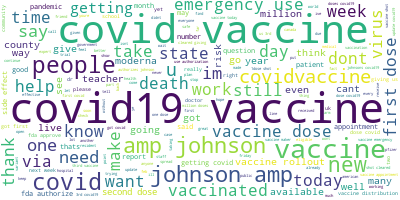

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(Tweets_J['Text_stop'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()